In [1]:
#Load in the data
import pandas as pd
import numpy as np

data = r'C:\Users\Matt\Desktop\suicide-rates-unit2-project\master.csv'
df = pd.read_csv(data)

In [2]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, minimal = True)
profile.to_file(output_file="suicide-report.html")

In [4]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k_pop         0
country-year              0
HDI_for_year          19456
_gdp_for_year_($)_        0
gdp_per_capita_($)        0
generation                0
dtype: int64

In [5]:
#Human Development Index(HDI) started to be tracked in 1990
df['HDI_for_year'].value_counts()

0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
         ..
0.614    12
0.728    12
0.522    12
0.879    12
0.924    12
Name: HDI_for_year, Length: 305, dtype: int64

In [6]:
df.shape

(27820, 12)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from bokeh.plotting import figure
from bokeh.io import output_file, show


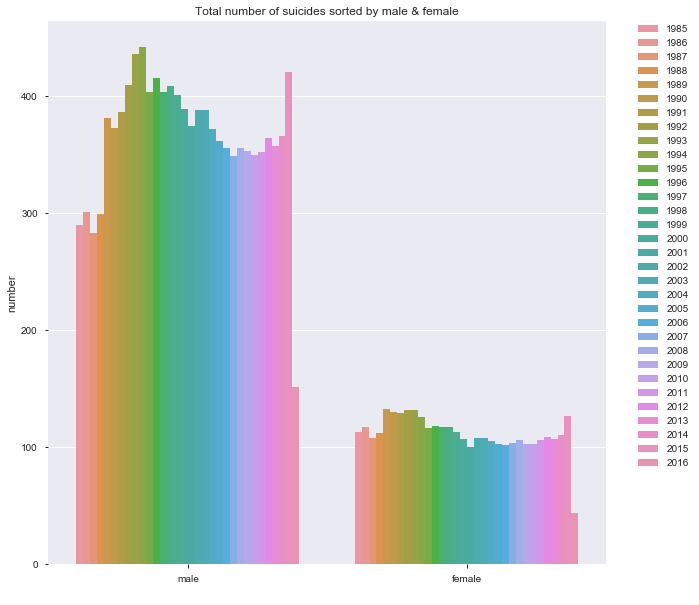

In [8]:
#Suicide rates by gender

plt.figure(figsize = (10,10))
sns.barplot(x = 'sex',y = 'suicides_no', data = df, ci = None, hue = 'year')
plt.title('Total number of suicides sorted by male & female')
plt.xlabel(' ')
plt.ylabel('number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
#gets me all the data per year per country
group_data = df.groupby(['country','year'])['suicides_no'].sum()
group_data

country     year
Albania     1987      73
            1988      63
            1989      68
            1992      47
            1993      73
                    ... 
Uzbekistan  2010    1464
            2011    1640
            2012    1835
            2013    1950
            2014    2095
Name: suicides_no, Length: 2321, dtype: int64

In [10]:
group_by_age = df.groupby(['year','age'])['suicides_no'].sum()
group_by_age

year  age        
1985  15-24 years    17870
      25-34 years    20771
      35-54 years    35748
      5-14 years       984
      55-74 years    28736
                     ...  
2016  15-24 years     1195
      25-34 years     2070
      35-54 years     5766
      55-74 years     4715
      75+ years       1857
Name: suicides_no, Length: 191, dtype: int64

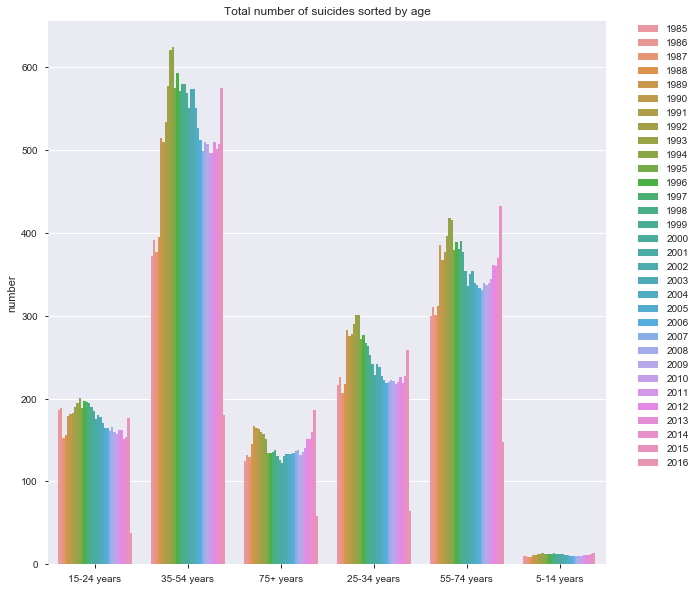

In [11]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'age',y = 'suicides_no', data = df, ci = None, hue = 'year')
plt.title('Total number of suicides sorted by age')
plt.xlabel(' ')
plt.ylabel('number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [12]:
#dropping 2016 as it appeared to be incomplete
i = df[((df.year == 2016))].index
df = df.drop(i)

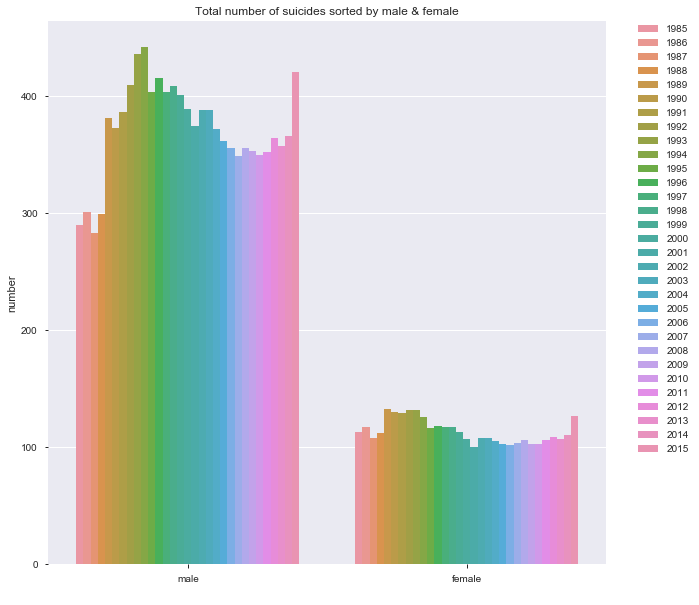

In [13]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'sex',y = 'suicides_no', data = df, ci = None, hue = 'year')
plt.title('Total number of suicides sorted by male & female')
plt.xlabel(' ')
plt.ylabel('number')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
df.corr()

,year,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_per_capita_($)
year,1.000000,-0.002953,0.011583,-0.039800,0.366786,0.338854
suicides_no,-0.002953,1.000000,0.616105,0.307103,0.151399,0.062168
population,0.011583,0.616105,1.000000,0.008461,0.102943,0.083006
suicides/100k_pop,-0.039800,0.307103,0.008461,1.000000,0.074279,0.002015
HDI_for_year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita_($),0.338854,0.062168,0.083006,0.002015,0.771228,1.000000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

train, val, = train_test_split(df, random_state = 42)
train.shape, val.shape

((20745, 12), (6915, 12))

In [43]:
target = 'suicides/100k_pop'


In [44]:
train_features = train.drop(columns=[target, 'suicides_no'])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

features = numeric_features + categorical_features

In [45]:
x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target]


In [46]:
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [47]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    RandomForestRegressor()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(x_train.columns)+1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=1000, 
    cv=5, 
    verbose=10, 
    return_train_score=True, 
    n_jobs=6
)

search.fit(x_train, y_train);

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning:

The total space of parameters 14 is smaller than n_iter=1000. Running 14 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    2.4s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   10.6s
[Parallel(n_jobs=6)]: Done  67 out of  70 | elapsed:   28.6s remaining:    1.2s
[Parallel(n_jobs=6)]: Done  70 out of  70 | elapsed:   31.7s finished


In [48]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
print('Validation Accuracy', pipeline.score(x_val, y_val))

Best hyperparameters {'simpleimputer__strategy': 'mean', 'selectkbest__k': 7}
Cross-validation MAE -0.6596952476899872
Validation Accuracy 0.7052502630110449


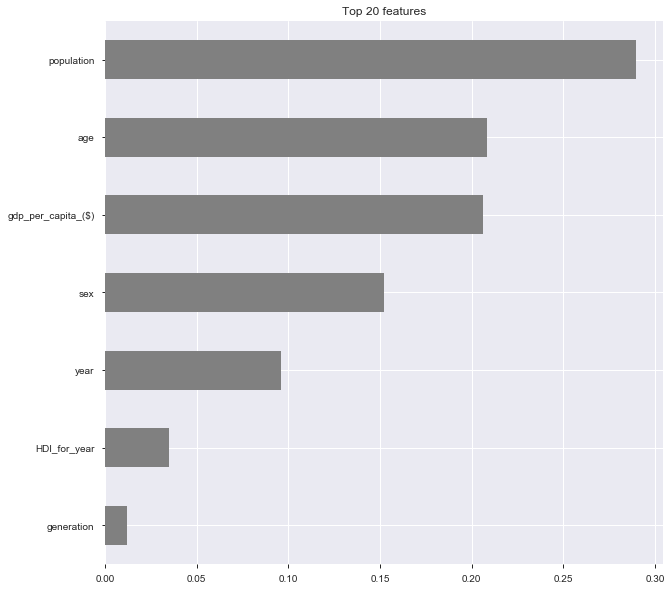

In [52]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, x_train.columns)
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [56]:
from sklearn.impute import SimpleImputer
encoder = ce.OneHotEncoder()
imputer = SimpleImputer()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.fit(x_val)

x_train_imputed = imputer.fit_transform(x_train_encoded)
x_val_imputed = imputer.transform(x_val_encoded)

linear_reg.fit(x_train_imputed, y_train)

TypeError: float() argument must be a string or a number, not 'OneHotEncoder'